In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [2]:
data = yf.Ticker('TSLA')
today = datetime.today().strftime('%Y-%m-%d')
stock = data.history(start='2020-01-01', end=today)
df = stock[['Close']]
df = df.reset_index(drop=True) 

In [3]:
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0


In [4]:
stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-01 00:00:00-04:00,298.459991,305.890015,293.209991,300.709991,145085700,0.0,0.0
2025-07-02 00:00:00-04:00,312.630005,316.829987,303.820007,315.649994,119483700,0.0,0.0
2025-07-03 00:00:00-04:00,317.989990,318.450012,312.760010,315.350006,58042300,0.0,0.0
2025-07-07 00:00:00-04:00,291.369995,296.149994,288.769989,293.940002,131177900,0.0,0.0
2025-07-08 00:00:00-04:00,297.000000,304.049988,294.350006,297.809998,102736500,0.0,0.0


In [5]:
stock.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.0,1385.000000
mean,222.969127,228.071958,217.496572,222.884086,1.240919e+08,0.0,0.005776
std,86.795487,88.646629,84.556743,86.557931,7.924448e+07,0.0,0.156630
min,24.980000,26.990667,23.367332,24.081333,2.940180e+07,0.0,0.000000
25%,178.050003,182.639999,174.710007,178.009995,7.636640e+07,0.0,0.000000
50%,227.690002,232.509995,222.536667,227.406662,1.019145e+08,0.0,0.000000
75%,272.679993,278.980011,266.369995,272.200012,1.423554e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


In [6]:
df.head()

,Close
0,28.684000
1,29.534000
2,30.102667
3,31.270666
4,32.809334


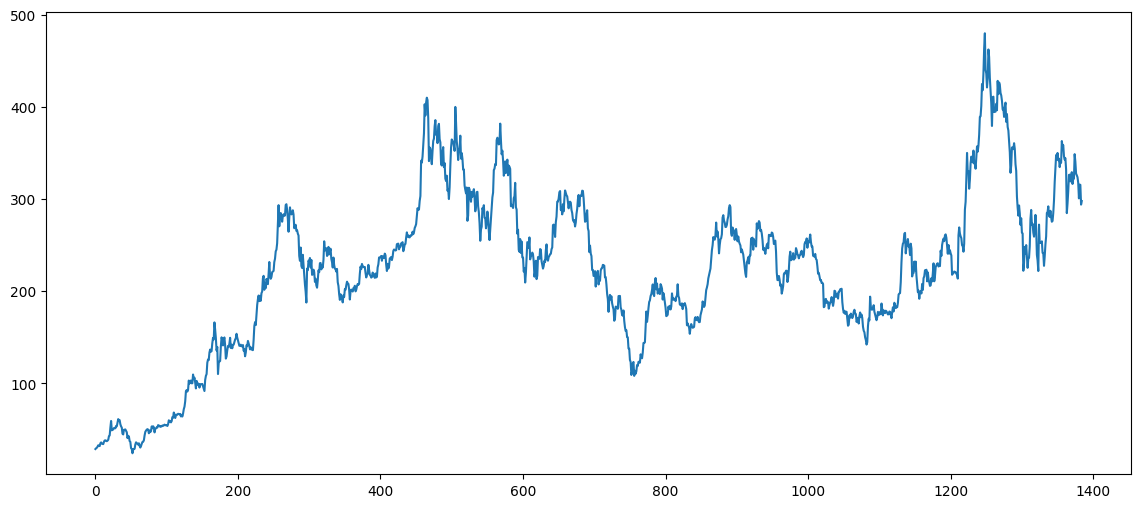

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df.Close)

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(df)

In [9]:
X = []
y = []
sequence_length = 100

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

In [10]:
# Data Split: 70% train, 15% val, 15% test
train_size = int(0.7 * len(X))
val_size = int(0.85 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:val_size], y[train_size:val_size]
X_test, y_test = X[val_size:], y[val_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [11]:
# ML Model

from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    
    LSTM(64, return_sequences=True),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    Dropout(0.4),
    
    LSTM(128),
    Dropout(0.5),
    
    Dense(1)  
])

print(model.summary())

C:\Users\Arnav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 32)             │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,153 (629.50 KB)

 Trainable params: 161,153 (629.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 380ms/step - loss: 0.0744 - val_loss: 0.0027
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - loss: 0.0104 - val_loss: 0.0029
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - loss: 0.0079 - val_loss: 0.0024
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - loss: 0.0081 - val_loss: 0.0032
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - loss: 0.0075 - val_loss: 0.0023
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - loss: 0.0073 - val_loss: 0.0027
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - loss: 0.0070 - val_loss: 0.0041
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 290ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - loss: 0.0065 - val_loss: 0.0026
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - loss: 0.0053 - val_loss: 0.0019
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/s

In [13]:
model.save('pred_model.keras')

In [14]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step


In [15]:
mae = mean_absolute_error(real_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 19.8807
RMSE: 25.5084


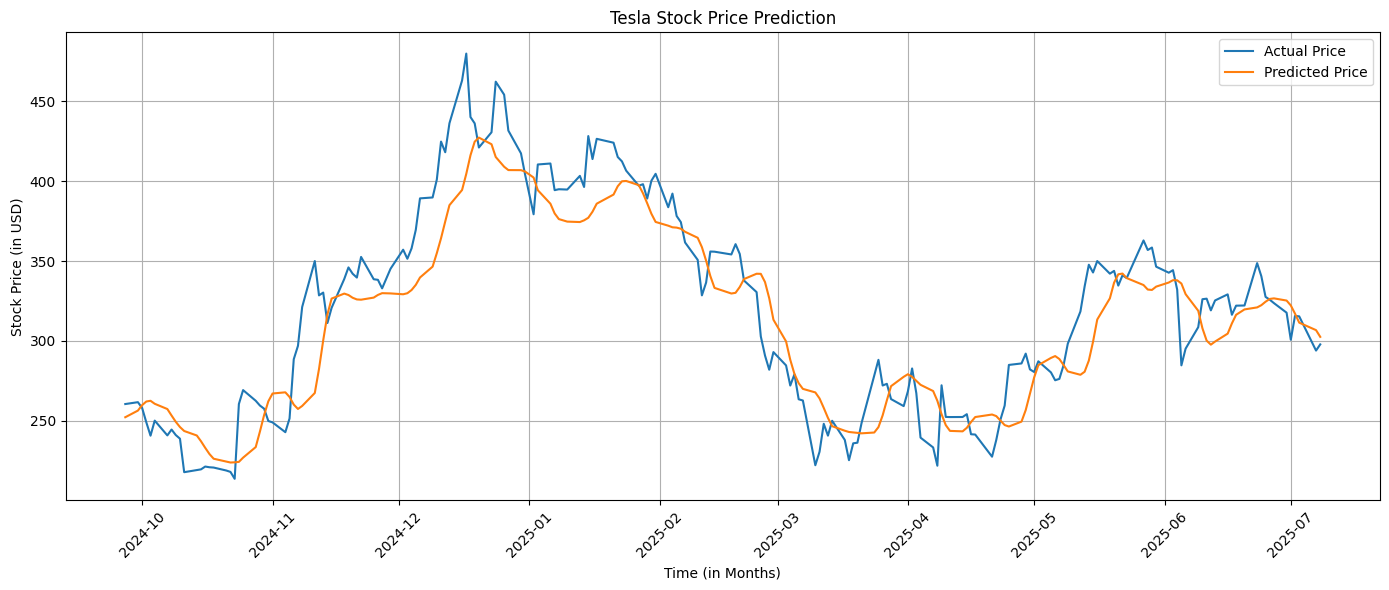

In [17]:
dates = stock.index
test_start_index = sequence_length + val_size 
test_dates = dates[test_start_index:test_start_index + len(y_test)]

plt.figure(figsize=(14,6))
plt.plot(test_dates, real_prices, label='Actual Price')
plt.plot(test_dates, predicted_prices, label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time (in Months)')
plt.ylabel('Stock Price (in USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()